##### **Name:** Rohan Karthikeyan
##### **Roll number:** MDS202226

In this notebook, we will predict the air quality of locations in Pune.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set some options
pd.set_option('display.max_columns', 50)

## Reading and processing the data

We read and process the train and test data sets for our task:

In [ ]:
# Loading data set
train_set = pd.read_csv('../input/endsem/Task2_Train.csv')
test_set = pd.read_csv('../input/endsem/Task2_Test.csv')

# See a few rows of the training set
train_set

/tmp/ipykernel_47/2666209421.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_set = pd.read_csv('../input/endsem/Task2_Train.csv')


NAME     AQI AQI_POLLUTANT  CATEGORY  \
0            ABC Farm House Junction_4  117.71            CO  MODERATE   
1               BRTS Visharant wadi_38  121.84           NO2  MODERATE   
2       ChurchKhadakiRailwayStation_36  108.11           NO2  MODERATE   
3            Kothrud PMPML BusDepot_48  134.01           NO2  MODERATE   
4               Market Yard Junction_2  142.61           NO2  MODERATE   
...                                ...     ...           ...       ...   
417632         Sinhgad Road Junction_9  102.03            CO  MODERATE   
417633                 Warje_Square_21  157.93           NO2  MODERATE   
417634                FursungiKaman_31  159.37           NO2  MODERATE   
417635                      Susgaon_46  122.77           NO2  MODERATE   
417636            Nanded City Entry_42  157.17         OZONE  MODERATE   

        HUMIDITY      LIGHT  NO_MAX  NO_MIN  NO2_MAX  NO2_MIN  OZONE_MAX  \
0         17.463    3366.12       0       0     60.0     40.0       13.0   
1         21.642   1349.702       0       0     70.0     66.0       20.0   
2         21.131   2128.711       0       0     62.0     56.0       36.0   
3         17.926    840.325       0       0     77.0     75.0       21.0   
4         19.240   2549.996       0       0     86.0     82.0        6.0   
...          ...        ...     ...     ...      ...      ...        ...   
417632    73.588   7499.692       0       0     32.0     31.0       51.0   
417633    73.589  13464.328       0       0     95.0     91.0        0.0   
417634    67.556   9586.987       0       0     94.0     92.0        0.0   
417635    81.521   3927.719       0       0     70.0     68.0       21.0   
417636    78.839  10165.393       0       0      3.0      2.0       85.0   

        OZONE_MIN  PM10_MAX  PM10_MIN  PM2_MAX  PM2_MIN  SO2_MAX  SO2_MIN  \
0             0.0      22.0      16.0     18.0     14.0      4.0      0.0   
1             0.0      27.0      22.0     22.0     19.0      3.0      3.0   
2             0.0      23.0      19.0     19.0     17.0      3.0      3.0   
3             0.0      21.0      17.0     17.0     14.0      5.0      4.0   
4             0.0      27.0      23.0     22.0     20.0      3.0      3.0   
...           ...       ...       ...      ...      ...      ...      ...   
417632       31.0       3.0       3.0      2.0      1.0      3.0      3.0   
417633        0.0       3.0       3.0      2.0      2.0      3.0      2.0   
417634        0.0      71.0      60.0     19.0     16.0      0.0      0.0   
417635       15.0       1.0       0.0      1.0      0.0      0.0      0.0   
417636       67.0       3.0       2.0      2.0      1.0      1.0      1.0   

        CO_MAX  CO_MIN  CO2_MAX  CO2_MIN   SOUND  TEMPRATURE_MAX  \
0        123.0    71.0    374.0    308.0  85.321            42.0   
1        106.0    55.0      0.0      0.0  83.599            38.0   
2        106.0    69.0    441.0    421.0  72.519            40.0   
3        119.0    61.0    315.0    251.0  75.843            42.0   
4        108.0    49.0    432.0    337.0  78.756            40.0   
...        ...     ...      ...      ...     ...             ...   
417632   109.0    25.0    380.0    347.0  69.842            28.0   
417633    89.0    16.0    133.0      0.0  81.086            27.0   
417634    64.0    16.0    704.0    668.0  68.957            29.0   
417635    54.0     7.0    243.0    103.0  83.437            26.0   
417636    21.0     6.0    341.0    198.0  66.240            27.0   

        TEMPRATURE_MIN  UV_MAX  UV_MIN  AIR_PRESSURE LASTUPDATEDATETIME  \
0                 24.0     2.1     0.1         0.931   13-05-2019 12:16   
1                 25.0     0.3     0.1         0.931   13-05-2019 12:16   
2                 24.0     0.9     0.1         0.930   13-05-2019 12:16   
3                 24.0     2.8     0.1         0.927   13-05-2019 12:16   
4                 26.0     3.4     0.1         0.927   13-05-2019 12:16   
...                ...     ...     ...  

In [ ]:
# Get summary statistics of the numeric columns
train_set.describe()

AQI       HUMIDITY    NO_MAX    NO_MIN        NO2_MAX  \
count  417637.000000  375670.000000  417637.0  417637.0  413854.000000   
mean      137.259477      64.476643       0.0       0.0      73.730888   
std        48.363774      21.823076       0.0       0.0      35.162487   
min         0.000000       8.445000       0.0       0.0       0.000000   
25%       108.950000      50.229000       0.0       0.0      52.000000   
50%       135.420000      70.102000       0.0       0.0      77.000000   
75%       165.520000      82.365000       0.0       0.0      98.000000   
max       536.660000     105.452000       0.0       0.0     459.000000   

             NO2_MIN      OZONE_MAX      OZONE_MIN       PM10_MAX  \
count  413854.000000  413787.000000  413787.000000  411494.000000   
mean       63.289597      21.027923       5.622663      17.535750   
std        31.462492      29.634792      17.982682      14.800577   
min         0.000000       0.000000       0.000000       0.000000   
25%        41.000000       1.000000       0.000000       5.000000   
50%        67.000000      13.000000       0.000000      15.000000   
75%        89.000000      28.000000       0.000000      28.000000   
max       459.000000     335.000000     333.000000     109.000000   

            PM10_MIN        PM2_MAX        PM2_MIN        SO2_MAX  \
count  411494.000000  411494.000000  411494.000000  405528.000000   
mean       13.365604      13.782167      10.730611       4.877333   
std        12.454629      10.072994       8.716963       8.506812   
min         0.000000       0.000000       0.000000       0.000000   
25%         3.000000       5.000000       3.000000       1.000000   
50%        11.000000      13.000000       9.000000       3.000000   
75%        21.000000      21.000000      17.000000       6.000000   
max       100.000000      82.000000      61.000000     201.000000   

             SO2_MIN         CO_MAX         CO_MIN        CO2_MAX  \
count  405528.000000  414687.000000  414687.000000  411919.000000   
mean        2.825169      94.732878      41.883500     265.489118   
std         4.875616      40.215721      28.203859     246.469864   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000      72.000000      19.000000      29.000000   
50%         2.000000     103.000000      39.000000     278.000000   
75%         4.000000     114.000000      61.000000     414.000000   
max       180.000000     387.000000     387.000000    2584.000000   

             CO2_MIN          SOUND  TEMPRATURE_MAX  TEMPRATURE_MIN  \
count  411919.000000  375675.000000   383254.000000   383254.000000   
mean      187.243361      74.465968       34.075109       24.566168   
std       197.182887       7.258061        5.867792        2.028948   
min         0.000000      56.671000       21.000000       17.000000   
25%         0.000000      69.939000       29.000000       23.000000   
50%       112.000000      74.818000       33.000000       24.000000   
75%       347.000000      79.214000       39.000000       26.000000   
max       752.000000     102.009000       55.000000       46.000000   

              UV_MAX         UV_MIN   AIR_PRESSURE      Lattitude  \
count  392916.000000  392916.000000  375679.000000  417637.000000   
mean        1.252899       0.089080       0.929625      18.519379   
std         1.667542       0.111577       0.068396       0.030674   
min         0.000000       0.000000       0.000000      18.451705   
25%         0.000000       0.000000       0.928000      18.501556   
50%         0.400000       0.100000       0.930000      18.524766   
75%         2.200000       0.100000       0.932000      18.539597   
max         8.800000       3.700000      20.863000      18.569998   

           Longitude  
count  417637.000000  
mean       73.843312  
std         0.047864  
min        73.747484  
25%        73.792927  
50%        73.849481  
75%        73.876958  
max        73.954047

Observe that the `NO_MAX` AND `NO_MIN` columns are all zeros. We drop them from both the train and test sets.

In [ ]:
# Apply preprocessing steps to both train and test sets
def shift_and_process(data):
    # Shift columns
    cols = list(data.columns)
    data = data[cols[-3:] + cols[:-3]]

    # Rename columns
    data.rename(columns={'LASTUPDATEDATETIME': 'Timestamp'}, inplace=True)

    # Convert to datetime
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], dayfirst=True)

    # Delete columns
    data.drop(columns=['NO_MAX', 'NO_MIN'], inplace=True)
    return data

train_set = shift_and_process(train_set)
test_set = shift_and_process(test_set)

The `AQI_POLLUTANT` column has some null values. Before dropping them, let us inspect the AQI values of such rows:

<Axes: xlabel='AQI', ylabel='Frequency'>

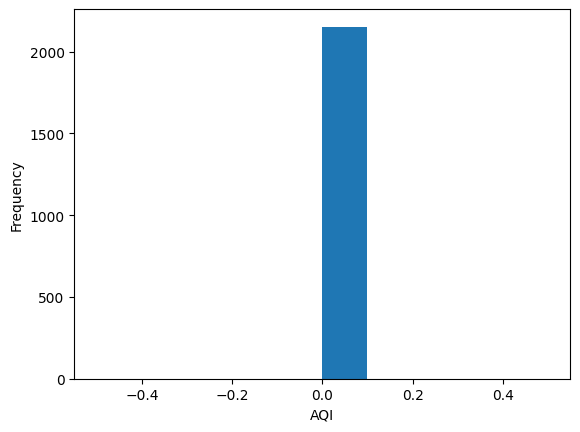

In [ ]:
train_set[train_set.AQI_POLLUTANT.isnull()]['AQI'].plot(kind='hist', xlabel='AQI')

It seems that all the corresponding AQI values are 0. So, we drop these rows:

In [ ]:
# Remove null values in AQI_pollutant
train_set.dropna(subset=['AQI_POLLUTANT'], inplace=True)
train_set

Timestamp  Lattitude  Longitude  \
0      2019-05-13 12:16:00  18.538857  73.903019   
1      2019-05-13 12:16:00  18.561238  73.878972   
2      2019-05-13 12:16:00  18.562059  73.808384   
3      2019-05-13 12:16:00  18.506206  73.792772   
4      2019-05-13 12:16:00  18.481994  73.874147   
...                    ...        ...        ...   
417632 2019-09-06 08:01:00  18.470282  73.818883   
417633 2019-09-06 08:01:00  18.479461  73.802944   
417634 2019-09-06 08:01:00  18.482730  73.954047   
417635 2019-09-06 08:01:00  18.548270  73.747484   
417636 2019-09-06 08:01:00  18.461066  73.785419   

                                  NAME     AQI AQI_POLLUTANT  CATEGORY  \
0            ABC Farm House Junction_4  117.71            CO  MODERATE   
1               BRTS Visharant wadi_38  121.84           NO2  MODERATE   
2       ChurchKhadakiRailwayStation_36  108.11           NO2  MODERATE   
3            Kothrud PMPML BusDepot_48  134.01           NO2  MODERATE   
4               Market Yard Junction_2  142.61           NO2  MODERATE   
...                                ...     ...           ...       ...   
417632         Sinhgad Road Junction_9  102.03            CO  MODERATE   
417633                 Warje_Square_21  157.93           NO2  MODERATE   
417634                FursungiKaman_31  159.37           NO2  MODERATE   
417635                      Susgaon_46  122.77           NO2  MODERATE   
417636            Nanded City Entry_42  157.17         OZONE  MODERATE   

        HUMIDITY      LIGHT  NO2_MAX  NO2_MIN  OZONE_MAX  OZONE_MIN  PM10_MAX  \
0         17.463    3366.12     60.0     40.0       13.0        0.0      22.0   
1         21.642   1349.702     70.0     66.0       20.0        0.0      27.0   
2         21.131   2128.711     62.0     56.0       36.0        0.0      23.0   
3         17.926    840.325     77.0     75.0       21.0        0.0      21.0   
4         19.240   2549.996     86.0     82.0        6.0        0.0      27.0   
...          ...        ...      ...      ...        ...        ...       ...   
417632    73.588   7499.692     32.0     31.0       51.0       31.0       3.0   
417633    73.589  13464.328     95.0     91.0        0.0        0.0       3.0   
417634    67.556   9586.987     94.0     92.0        0.0        0.0      71.0   
417635    81.521   3927.719     70.0     68.0       21.0       15.0       1.0   
417636    78.839  10165.393      3.0      2.0       85.0       67.0       3.0   

        PM10_MIN  PM2_MAX  PM2_MIN  SO2_MAX  SO2_MIN  CO_MAX  CO_MIN  CO2_MAX  \
0           16.0     18.0     14.0      4.0      0.0   123.0    71.0    374.0   
1           22.0     22.0     19.0      3.0      3.0   106.0    55.0      0.0   
2           19.0     19.0     17.0      3.0      3.0   106.0    69.0    441.0   
3           17.0     17.0     14.0      5.0      4.0   119.0    61.0    315.0   
4           23.0     22.0     20.0      3.0      3.0   108.0    49.0    432.0   
...          ...      ...      ...      ...      ...     ...     ...      ...   
417632       3.0      2.0      1.0      3.0      3.0   109.0    25.0    380.0   
417633       3.0      2.0      2.0      3.0      2.0    89.0    16.0    133.0   
417634      60.0     19.0     16.0      0.0      0.0    64.0    16.0    704.0   
417635       0.0      1.0      0.0      0.0      0.0    54.0     7.0    243.0   
417636       2.0      2.0      1.0      1.0      1.0    21.0     6.0    341.0   

        CO2_MIN   SOUND  TEMPRATURE_MAX  TEMPRATURE_MIN  UV_MAX  UV_MIN  \
0         308.0  85.321            42.0            24.0     2.1     0.1   
1           0.0  83.599            38.0            25.0     0.3     0.1   
2         421.0  72.519            40.0            24.0     0.9     0.1   
3         251.0  75.843            42.0            24.0     2.8     0.1   
4         337.0  78.756            40.0            26.0     3.4     0.1   
...         ...     ...             ...             ...     ...     ...   
417632    347.0  69.842         

We are now going to check if we have to adapt specific models for each place. Our job is made easier by the fact that each place (in the `NAME` column) has an associated ID with it. For example, the ID for `Warje_Square_21` is 21.

We will check for the presence of common IDs in both the train and test sets.
- If there are many such IDs, it would be worthwhile to explore adapting specific models.
- Else, it would be efficient to drop the `NAME` column.

In [ ]:
# Check if all entries have a _ delimiter in the NAME column
under_count = train_set['NAME'].str.contains('_').sum()
assert under_count == train_set.shape[0]

# Split the NAME column to check for overlap b/w IDs in train and test sets
train_set['ID'] = [x.rsplit("_", 1)[-1] for x in train_set["NAME"]]
test_set['ID'] = [x.rsplit("_", 1)[-1] for x in test_set["NAME"]]

# Check for common IDs in train and test sets
common_ids = np.intersect1d(train_set.ID, test_set.ID)
print('There are {} IDs shared by the train and test sets.'.format(len(common_ids)))

# Are they the same locations?
assert train_set[train_set.ID.isin(common_ids)]['NAME'].unique() == test_set[test_set.ID.isin(common_ids)]['NAME'].unique()

There are 1 IDs shared by the train and test sets.


AssertionError: 

This concludes that we can safely ignore the `NAME` column while training.

In [ ]:
# Delete the ID column
train_set.drop(columns=['ID'], inplace=True)
test_set.drop(columns=['ID'], inplace=True)

## Exploratory data analysis

Let us now perform some exploratory analysis on the training data.

### Checking for proper data types

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415484 entries, 0 to 417636
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Timestamp       415484 non-null  datetime64[ns]
 1   Lattitude       415484 non-null  float64       
 2   Longitude       415484 non-null  float64       
 3   NAME            415484 non-null  object        
 4   AQI             415484 non-null  float64       
 5   AQI_POLLUTANT   415484 non-null  object        
 6   CATEGORY        415484 non-null  object        
 7   HUMIDITY        375670 non-null  float64       
 8   LIGHT           370494 non-null  object        
 9   NO2_MAX         413852 non-null  float64       
 10  NO2_MIN         413852 non-null  float64       
 11  OZONE_MAX       413785 non-null  float64       
 12  OZONE_MIN       413785 non-null  float64       
 13  PM10_MAX        411492 non-null  float64       
 14  PM10_MIN        411492 non-null  float64 

We change the data type of the `LIGHT` column to a float value. If there are some rogue elements, we will convert them to `NaN`.

In [ ]:
# Coerce LIGHT column to int
train_set['LIGHT'] = pd.to_numeric(train_set['LIGHT'], errors='coerce')

### Dealing with missing values

Though we could possibly perform imputation on some of the columns with missing values, for simplicity, we simply drop these rows.

In [ ]:
# Quantify the missing values in each column
print(train_set.isna().sum())

# Result - Drop all rows with null values anywhere
train_set = train_set.dropna()
train_set = train_set.reset_index(drop=True)

Timestamp             0
Lattitude             0
Longitude             0
NAME                  0
AQI                   0
AQI_POLLUTANT         0
CATEGORY              0
HUMIDITY          39814
LIGHT             44991
NO2_MAX            1632
NO2_MIN            1632
OZONE_MAX          1699
OZONE_MIN          1699
PM10_MAX           3992
PM10_MIN           3992
PM2_MAX            3992
PM2_MIN            3992
SO2_MAX            9958
SO2_MIN            9958
CO_MAX              799
CO_MIN              799
CO2_MAX            3565
CO2_MIN            3565
SOUND             39809
TEMPRATURE_MAX    32230
TEMPRATURE_MIN    32230
UV_MAX            22568
UV_MIN            22568
AIR_PRESSURE      39805
dtype: int64


### Visualization
We are going to select 5 random locations (via the `NAME` column) and plot the AQI over time.

In [ ]:
import random

idx = random.sample(train_set.NAME.tolist(), 5)
small = train_set[train_set.NAME.isin(idx)]
small = small.reset_index(drop=True)

# Compute averages of columns
small['AVG_TEMP'] = (small['TEMPRATURE_MAX'] + small['TEMPRATURE_MIN'])/2
small['AVG_OZONE'] = (small['OZONE_MAX'] + small['OZONE_MIN'])/2
small

Timestamp  Lattitude  Longitude  \
0     2019-05-13 12:16:00  18.539597  73.780994   
1     2019-05-13 12:16:00  18.470282  73.818883   
2     2019-05-13 12:16:00  18.500048  73.856825   
3     2019-05-13 12:16:00  18.501557  73.867505   
4     2019-05-13 12:16:00  18.532228  73.816755   
...                   ...        ...        ...   
50502 2019-09-06 08:01:00  18.500048  73.856825   
50503 2019-09-06 08:01:00  18.501557  73.867505   
50504 2019-09-06 08:01:00  18.532228  73.816755   
50505 2019-09-06 08:01:00  18.539597  73.780994   
50506 2019-09-06 08:01:00  18.470282  73.818883   

                                 NAME     AQI AQI_POLLUTANT      CATEGORY  \
0               Golf Club Junction_27  159.50           NO2      MODERATE   
1             Sinhgad Road Junction_9  121.98            CO      MODERATE   
2                Swargate ST Stand_13  147.96           NO2      MODERATE   
3               Seven Loves Square_16  129.61           NO2      MODERATE   
4      Shree Krishna Hotel Square _12   99.75           NO2  SATISFACTORY   
...                               ...     ...           ...           ...   
50502            Swargate ST Stand_13  151.28           NO2      MODERATE   
50503           Seven Loves Square_16  155.68           NO2      MODERATE   
50504  Shree Krishna Hotel Square _12   43.04            CO          GOOD   
50505           Golf Club Junction_27  177.11           NO2      MODERATE   
50506         Sinhgad Road Junction_9  102.03            CO      MODERATE   

       HUMIDITY     LIGHT  NO2_MAX  NO2_MIN  OZONE_MAX  OZONE_MIN  PM10_MAX  \
0        19.260  2130.964     93.0     87.0       18.0        0.0      23.0   
1        18.468  2840.088     59.0     50.0       24.0        0.0      22.0   
2        17.540  1089.114     91.0     85.0        0.0        0.0      23.0   
3        14.722  4531.316    109.0     59.0       19.0        0.0      17.0   
4        16.768  3965.164     63.0     53.0       30.0        0.0      20.0   
...         ...       ...      ...      ...        ...        ...       ...   
50502    73.440   749.111     89.0     86.0        0.0        0.0      12.0   
50503    70.259  3162.083     91.0     88.0        0.0        0.0       3.0   
50504    80.259  3954.661     19.0     16.0       23.0        4.0      10.0   
50505    76.636  4606.217    104.0     99.0        0.0        0.0       3.0   
50506    73.588  7499.692     32.0     31.0       51.0       31.0       3.0   

       PM10_MIN  PM2_MAX  PM2_MIN  SO2_MAX  SO2_MIN  CO_MAX  CO_MIN  CO2_MAX  \
0          20.0     19.0     17.0      3.0      3.0   115.0    52.0    575.0   
1          17.0     18.0     15.0      5.0      4.0   125.0    70.0    383.0   
2          20.0     19.0     17.0      5.0      5.0   115.0    70.0    579.0   
3          13.0     14.0     12.0      7.0      0.0   122.0    44.0      5.0   
4          16.0     17.0     14.0      5.0      4.0    61.0     0.0    399.0   
...         ...      ...      ...      ...      ...     ...     ...      ...   
50502      10.0      6.0      5.0      1.0      0.0   104.0    29.0    345.0   
50503       2.0      1.0      1.0      1.0      0.0   101.0    24.0      0.0   
50504       7.0      9.0      7.0      3.0      3.0    50.0    15.0    520.0   
50505       2.0      2.0      1.0      0.0      0.0    67.0     9.0    314.0   
50506       3.0      2.0      1.0      3.0      3.0   109.0    25.0    380.0   

       CO2_MIN   SOUND  TEMPRATURE_MAX  TEMPRATURE_MIN  UV_MAX  UV_MIN  \
0        478.0  80.695            42.0            24.0     6.6     0.2   
1        331.0  73.511            41.0            24.0     0.5     0.2   
2        527.0  79.492            42.0            25.0     0.7     0.1   
3          0.0  75.756            43.0            24.0     4.7     0.1   
4        371.0  73.396            41.0            24.0     4.5     0.2   
...        ...     ...             ...             ...     ...     ...   
50502    308.0  74.991            28.0            

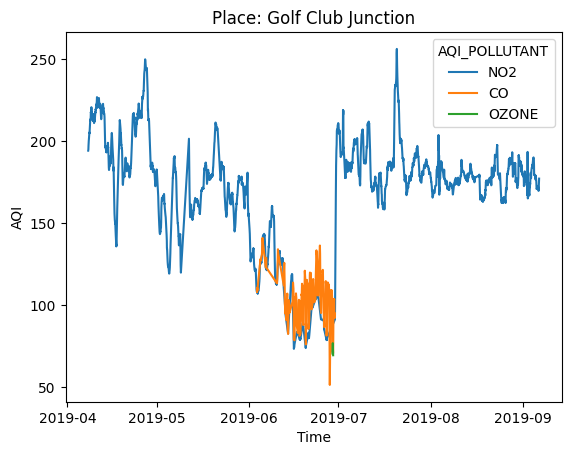

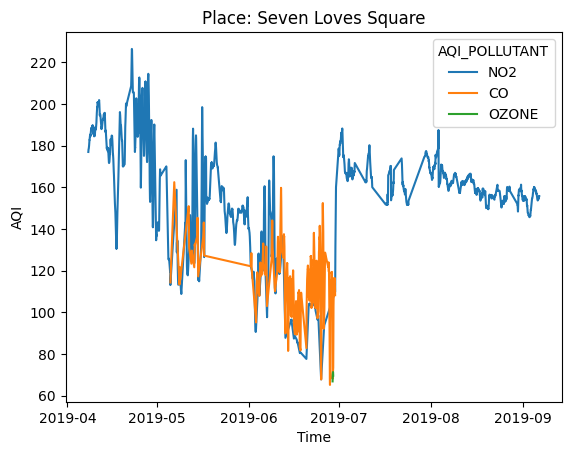

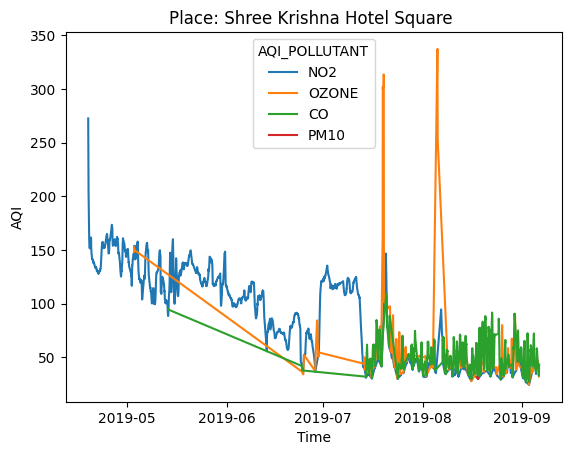

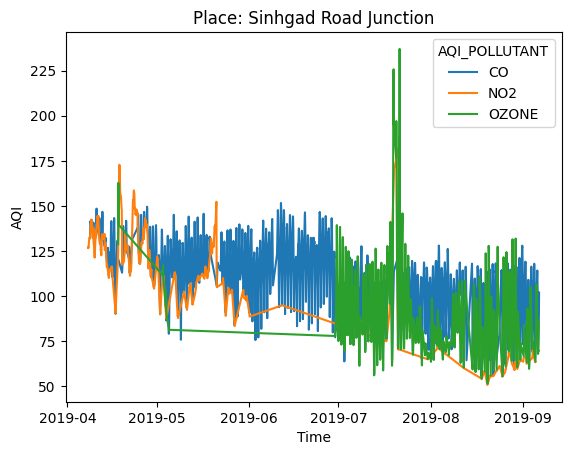

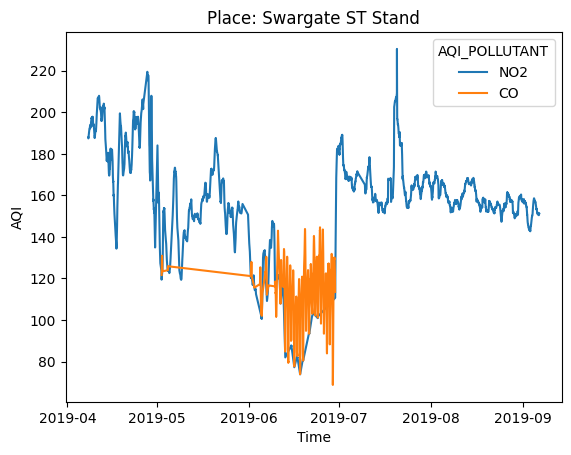

In [ ]:
for name, group in small.groupby(small.NAME):
    fig = sns.lineplot(data = group, x = 'Timestamp', y = 'AQI', hue = 'AQI_POLLUTANT')
    fig.set(xlabel = 'Time', ylabel = 'AQI', title = 'Place: {}'.format(name.rsplit('_', 1)[0]))
    plt.show()

There does not seem to be any discernible trend in the levels of air pollutants in the above sample.

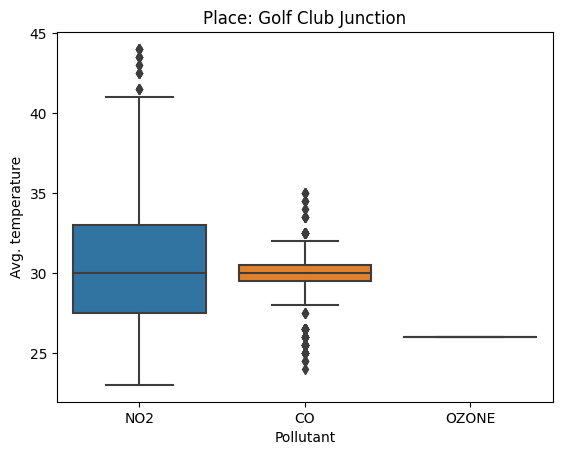

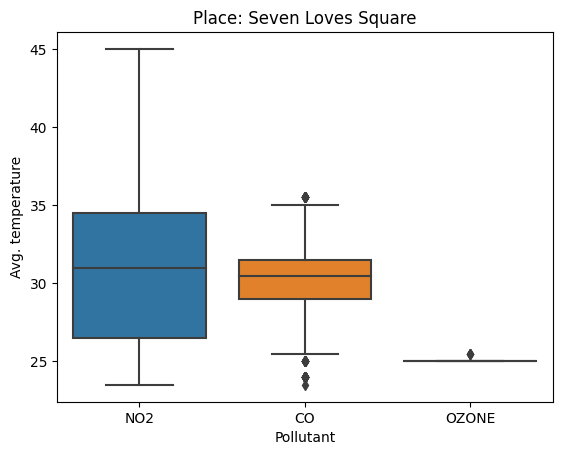

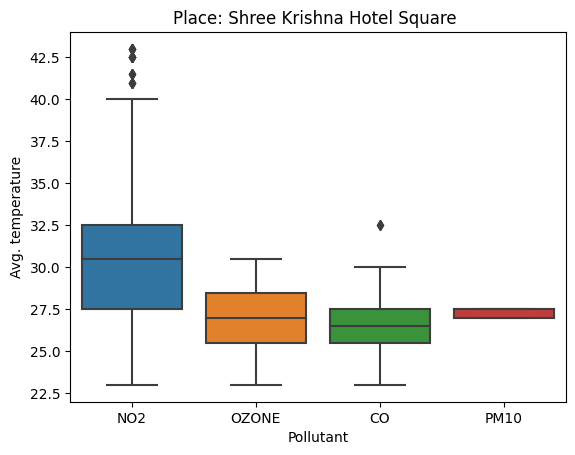

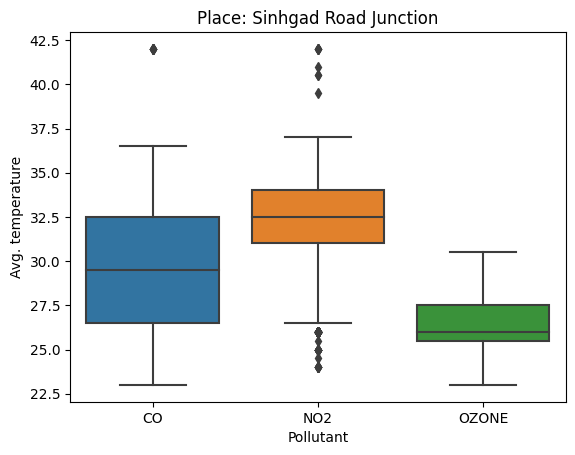

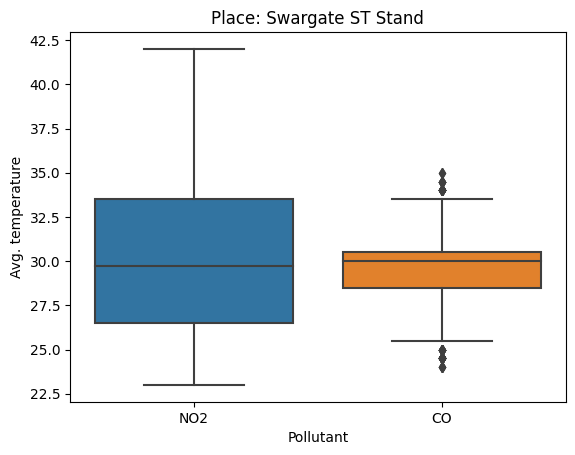

In [ ]:
for name, group in small.groupby(small.NAME):
    fig = sns.boxplot(data = group, x = 'AQI_POLLUTANT', y = 'AVG_TEMP')
    fig.set(xlabel = 'Pollutant', ylabel = 'Avg. temperature', title = 'Place: {}'.format(name.rsplit('_', 1)[0]))
    plt.show()

Almost all plots show that `NO2` is associated with a higher median air temperature than `Ozone` and `CO`.

## Modeling

Let us now process the training set. We must ensure that both the train and test sets must share the same features.
* As a result, we drop the `AQI_POLLUTANT`, and the`CATEGORY` columns.
* We additionally drop the redundant `NAME` column.

To keep things simple, we don't include the `Timestamp`, `Latitude` and `Longitude` columns as well.

In [ ]:
# Drop columns from training and test sets
X = train_set.drop(columns=['AQI_POLLUTANT', 'CATEGORY', 'NAME', 'Lattitude',
                            'Longitude', 'Timestamp'])
X_test = test_set.drop(columns=['NAME', 'Lattitude', 'Longitude', 'Timestamp'])

Text(0.5, 1.0, 'Correlation Heatmap')

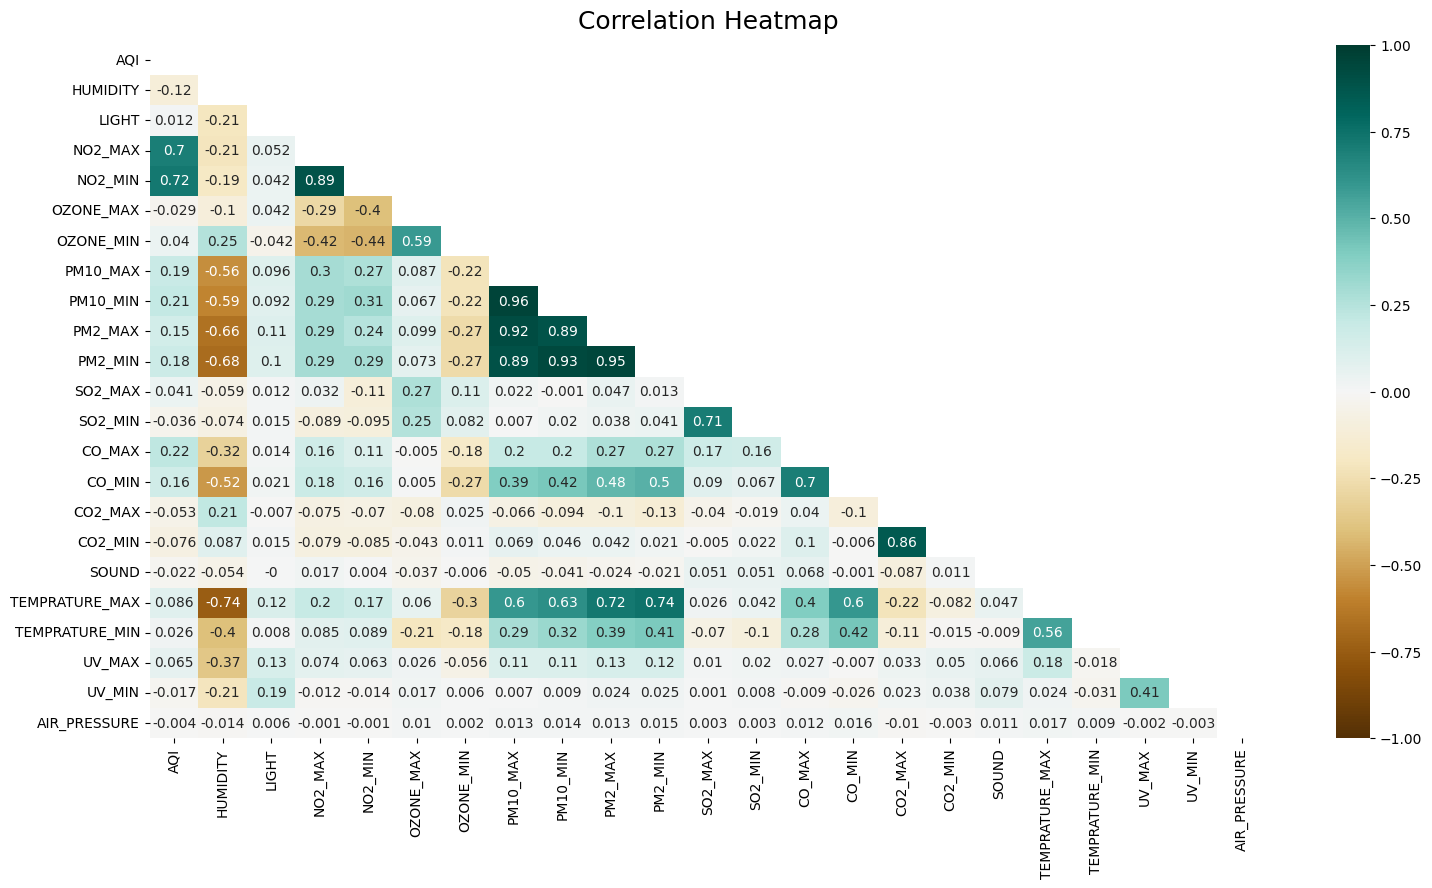

In [ ]:
plt.figure(figsize = (18, 9))

# Use triu() to isolate upper triangle of matrix
# while turning all values in the lower triangle to 0
mask = np.triu(np.ones_like(X.corr(), dtype = bool))

heatmap = sns.heatmap(X.corr().round(3), vmin = -1, vmax = 1, cmap = 'BrBG', mask = mask, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad = 12)

We can make some observations:

1. There is a high positive correlation between AQI and the NO2 levels.
2. There is high correlation between the minimum and maximum levels of the pollutants.
3. The negative correlation between temperature and humidity is to be expected.

### Feature engineering

We now create some features pertaining to average temperature and other pollutants.

In [ ]:
def get_averages(df):
    X = df.copy()
    X['AVG_NO2'] = (X['NO2_MAX'] + X['NO2_MIN'])/2
    X['AVG_CO'] = (X['CO_MAX'] + X['CO_MIN'])/2
    X['AVG_CO2'] = (X['CO2_MAX'] + X['CO2_MIN'])/2
    X['AVG_PM10'] = (X['PM10_MAX'] + X['PM10_MIN'])/2
    X['AVG_PM2'] = (X['PM2_MAX'] + X['PM2_MIN'])/2
    X['AVG_OZONE'] = (X['OZONE_MAX'] + X['OZONE_MIN'])/2
    X['AVG_TEMP'] = (X['TEMPRATURE_MAX'] + X['TEMPRATURE_MIN'])/2
    X['AVG_UV'] = (X['UV_MAX'] + X['UV_MIN'])/2
    X['AVG_SO2'] = (X['SO2_MAX'] + X['SO2_MIN'])/2

    return X

In [ ]:
from sklearn.model_selection import train_test_split

# Split train set into training and validation set
y = X.pop("AQI")
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state=34)

# Compute features separately for all sets
X_train = get_averages(X_train)
X_valid = get_averages(X_valid)
X_test = get_averages(X_test)

X_train

HUMIDITY     LIGHT  NO2_MAX  NO2_MIN  OZONE_MAX  OZONE_MIN  PM10_MAX  \
252086    85.962   256.280     98.0     93.0        2.0        0.0       0.0   
25155     51.101  1190.205     71.0     44.0       73.0        0.0      31.0   
164639    69.458  2024.372     36.0     34.0       14.0        0.0       8.0   
324325    88.331     2.011     73.0     72.0        2.0        0.0       5.0   
38218     17.154  3040.281     80.0     68.0       73.0        0.0      40.0   
...          ...       ...      ...      ...        ...        ...       ...   
38435     16.502  4039.965     92.0     63.0       39.0        0.0      40.0   
199765    82.470     1.509     82.0     77.0        0.0        0.0      19.0   
225014    70.751  8023.994     97.0     94.0        0.0        0.0       3.0   
153449    70.012     1.239     36.0     27.0        2.0        0.0      11.0   
305642    87.653     2.633     28.0     22.0       23.0        9.0       4.0   

        PM10_MIN  PM2_MAX  PM2_MIN  SO2_MAX  SO2_MIN  CO_MAX  CO_MIN  CO2_MAX  \
252086       0.0      0.0      0.0      1.0      0.0    34.0    11.0     14.0   
25155       17.0     23.0     14.0      8.0      4.0    88.0    41.0     29.0   
164639       6.0      8.0      6.0      4.0      4.0   102.0    50.0    271.0   
324325       3.0      2.0      2.0      1.0      0.0    96.0    15.0    225.0   
38218       30.0     30.0     23.0      6.0      5.0   111.0    82.0     29.0   
...          ...      ...      ...      ...      ...     ...     ...      ...   
38435       28.0     31.0     22.0      6.0      6.0   126.0   103.0     29.0   
199765      16.0     16.0     14.0      1.0      1.0     2.0     2.0    756.0   
225014       1.0      3.0      2.0      0.0      0.0    68.0    30.0    518.0   
153449       6.0     10.0      6.0      4.0      2.0    86.0    42.0      0.0   
305642       3.0      4.0      3.0     13.0     11.0   200.0    37.0    758.0   

        CO2_MIN   SOUND  TEMPRATURE_MAX  TEMPRATURE_MIN  UV_MAX  UV_MIN  \
252086      0.0  73.318            26.0            23.0     0.0     0.0   
25155      18.0  71.282            38.0            21.0     0.0     0.0   
164639    139.0  77.470            32.0            24.0     0.5     0.1   
324325     71.0  64.554            26.0            23.0     0.0     0.0   
38218      29.0  64.633            38.0            23.0     0.6     0.2   
...         ...     ...             ...             ...     ...     ...   
38435      29.0  79.331            39.0            25.0     0.3     0.1   
199765    389.0  84.745            29.0            24.0     0.0     0.0   
225014    477.0  80.363            31.0            24.0     1.5     0.2   
153449      0.0  73.522            34.0            27.0     0.0     0.0   
305642    546.0  62.040            30.0            23.0     0.0     0.0   

        AIR_PRESSURE  AVG_NO2  AVG_CO  AVG_CO2  AVG_PM10  AVG_PM2  AVG_OZONE  \
252086         0.931     95.5    22.5      7.0       0.0      0.0        1.0   
25155          0.938     57.5    64.5     23.5      24.0     18.5       36.5   
164639         0.927     35.0    76.0    205.0       7.0      7.0        7.0   
324325         0.916     72.5    55.5    148.0       4.0      2.0        1.0   
38218          0.934     74.0    96.5     29.0      35.0     26.5       36.5   
...              ...      ...     ...      ...       ...      ...        ...   
38435          0.932     77.5   114.5     29.0      34.0     26.5       19.5   
199765         0.931     79.5     2.0    572.5      17.5     15.0        0.0   
225014         0.930     95.5    49.0    497.5       2.0      2.5        0.0   
153449         0.931     31.5    64.0      0.0       8.5      8.0        1.0   
305642         0.930     25.0   118.5    652.0       3.5      3.5       16.0   

        AVG_TEMP  AVG_UV  AVG_SO2  
252086      24.5    0.00      0.5  
25155       29.5    0.00      6.0  
164639      28.0    0.30      4.0  
324325      24.5    0.00      0.5  
38218       30.5    0.40      5.

### Model 1: Decision Tree

In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor as DTR

tree_model = DTR(max_depth = 5, min_samples_split = 10, random_state=43)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_valid)

CPU times: user 1.74 s, sys: 27.7 ms, total: 1.77 s
Wall time: 1.88 s


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_valid, y_pred)
print('We have a RMSE of {:.3f} on the validation set.'.format(np.sqrt(mse)))

We have a RMSE of 17.421 on the validation set.


<Axes: title={'center': 'Feature importances'}, xlabel='Mean decrease in impurity'>

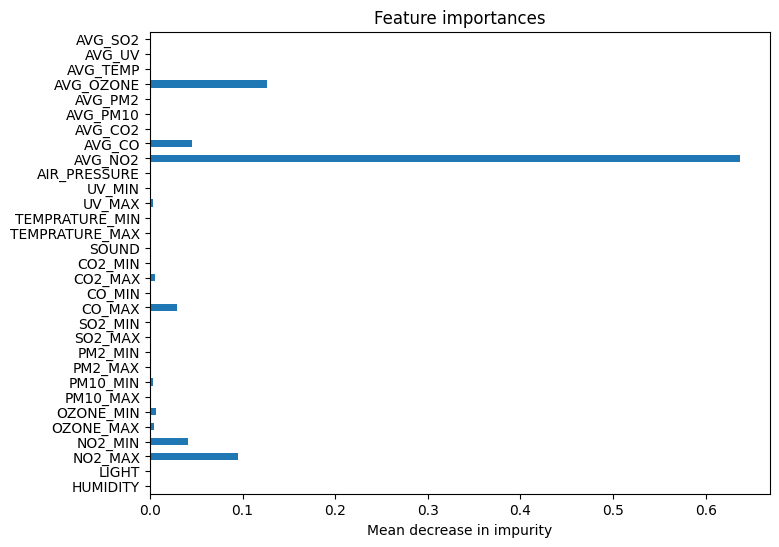

In [ ]:
# Check feature importances
feature_importances = tree_model.feature_importances_
feature_names = list(X_train.columns)

importances = pd.Series(feature_importances, index=feature_names)
importances.plot(kind='barh', title='Feature importances', xlabel='Mean decrease in impurity', figsize=(8,6))

#### Model 2: Histogram gradient boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor as HGB

# max_depth=None uses an unconstrained DTree
histgbr = HGB(max_depth=None, learning_rate=0.1,
              random_state=15, max_iter=200)
histgbr.fit(X_train, y_train)

y_preds = histgbr.predict(X_valid)
mse = mean_squared_error(y_valid, y_preds)
print('We have a RMSE of {:.3f} on the validation set.'.format(np.sqrt(mse)))

We have a RMSE of 8.995 on the validation set.


#### Predictions

We note that because the test set contains NaNs, we cannot use a decision tree for prediction. So, we use the above gradient boosting model.

In [ ]:
# Save our predictions
predictions = histgbr.predict(X_test)

output = pd.DataFrame({'Id': X_test.index, 'AQI': predictions})
output.to_csv('my_submission.csv', index=False)